**Google Playstore Analysis Using Python.**

Dataset has the information about the Apps,Rating & Downloads of Google Playstore.

**Importing Libraries.**

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Read Data.**

In [23]:
df=pd.read_csv("googleplaystore-dataset.csv")

**Exploring Dataset.**

.shape gives the information of records and columns of dataframe.

In [24]:
df.shape

(10841, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


* Dataset has 10841 rows and 13 columns.
* Categorical features - Category,Type,Content rating,Genres,
* Numerical features - Rating,reviews,size,install,price,current version
* There are null values in Rating,Type,Content rating,Current version,Android version.

.columns shows all the columns of dataframe.

In [26]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

.nunique gives the unique values of each column.

In [27]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

Find out null values in the dataframe.

In [28]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

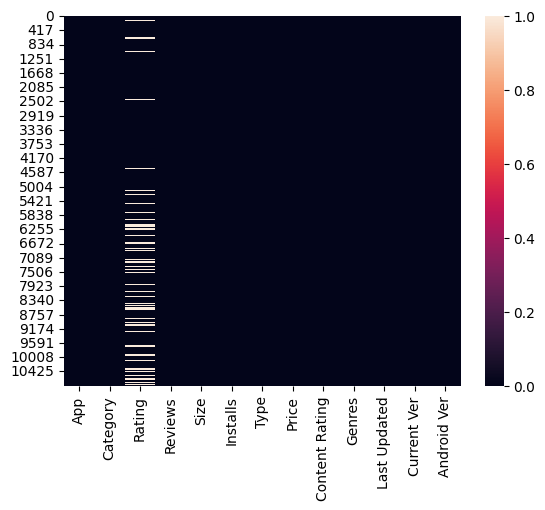

In [29]:
sns.heatmap(df.isnull())
plt.show()

Dropping the null values as it does not make a big difference.

In [30]:
df.dropna(axis = 0, inplace =True)

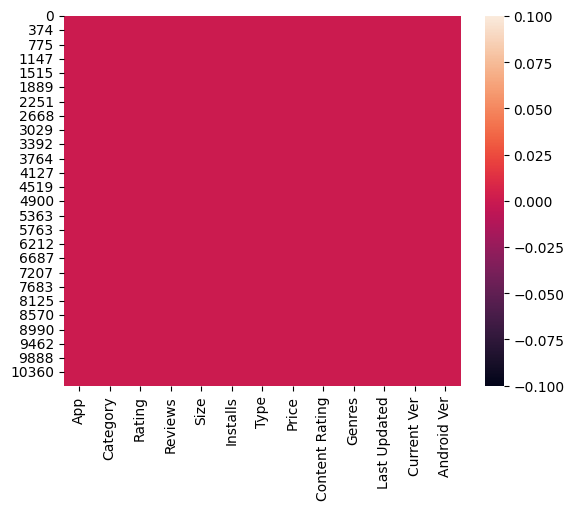

In [31]:
sns.heatmap(df.isnull())
plt.show()

Now check the duplicate values in the dataframe.

In [32]:
df.duplicated().sum()

474

In [33]:
df.drop_duplicates(keep='first',inplace=True)

In [34]:
df.duplicated().sum()

0

* There were around 474 duplicate values.
* We have dropped them.

Check the unique categories and drop the categories which are invalid.

In [35]:
list(pd.unique(df['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [37]:
df=df[df['Category']!='1.9']

* We have removed a category named 1.9 which is invalid.

Changing the datatypes for required columns.

In [45]:
df.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2812,LightX Photo Editor & Photo Effects,PHOTOGRAPHY,4.7,259450,17M,"10,000,000+",Free,0,Everyone,Photography,"May 24, 2018",1.0.4,4.1 and up


In [44]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [42]:
df['Reviews']=df['Reviews'].astype('int')

In [49]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [50]:
df['updated_year'] = df['Last Updated'].dt.year

In [51]:
df.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year
9676,Masha and the Bear. Games for kids,FAMILY,4.6,6231,31M,"1,000,000+",Free,0,Everyone,Educational;Pretend Play,2018-07-13,2.6,4.0.3 and up,2018


**Exploratory Data Analysis.**